## Observations and Insights

## Dependencies and starter code

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

## Summary statistics

In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean=(merge_df.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)'])
median=(merge_df.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)'])
variance=(merge_df.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)'])
std=(merge_df.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)'])
sem=(merge_df.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)'])

summary_stats=pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

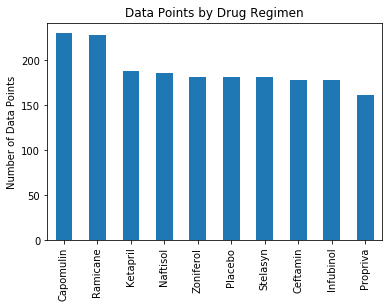

<Figure size 432x288 with 0 Axes>

In [189]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

count_data=merge_df["Drug Regimen"].value_counts()

count_chart=count_data.plot(kind="bar", title="Data Points by Drug Regimen")
count_chart.set_ylabel("Number of Data Points")
plt.show()
plt.tight_layout()

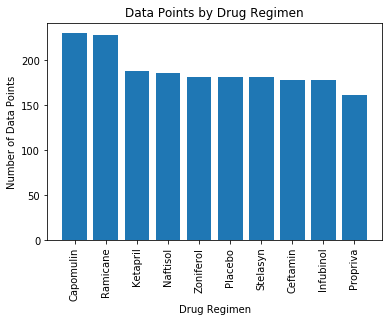

In [187]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count_data2 = merge_df["Drug Regimen"].value_counts()

plt.bar(count_data2.index.values,count_data2.values)
plt.title("Data Points by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()

## Pie plots

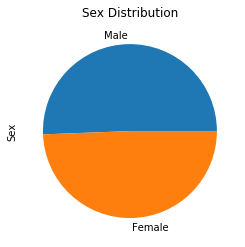

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count=merge_df["Sex"].value_counts()
gender_pie=gender_count.plot(kind="pie", title=("Sex Distribution"))

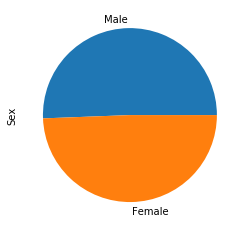

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count2 = merge_df["Sex"].value_counts()
plt.pie(gender_count2.values,labels=gender2.index.values)
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [211]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Most promising: Capomulin, Ramicane, Infubinol, Propriva

final_tumor_df=merge_df.groupby(["Mouse ID"]).max()
final_tumor_df=final_tumor_df.reset_index()

capomulin=final_tumor_df.loc[final_tumor_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
ramicane=final_tumor_df.loc[final_tumor_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
infubinol=final_tumor_df.loc[final_tumor_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
propriva=final_tumor_df.loc[final_tumor_df["Drug Regimen"]=="Propriva"]["Tumor Volume (mm3)"]


#Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin
cq=capomulin.quantile([.25,.5,.75])
cuq=cq[0.75]
clq=cq[0.25]
ciqr=cuq-clq
ct=cuq+(1.5*ciqr)
cb=clq-(1.5*ciqr)

#Ramicane
rq=ramicane.quantile([.25,.5,.75])
ruq=rq[0.75]
rlq=rq[0.25]
riqr=ruq-rlq
rt=ruq+(1.5*riqr)
rb=rlq-(1.5*riqr)

#Infubinol
iq=infubinol.quantile([.25,.5,.75])
iuq=iq[0.75]
ilq=iq[0.25]
iiqr=iuq-ilq
it=iuq+(1.5*iiqr)
ib=ilq-(1.5*iiqr)

#Propriva
pq=propriva.quantile([.25,.5,.75])
puq=pq[0.75]
plq=pq[0.25]
piqr=puq-plq
pt=puq+(1.5*piqr)
pb=plq-(1.5*piqr)

print(f"Potential Outliers (Capomulin): {capomulin.loc[(capomulin < cb) | (capomulin > ct)]}")

print(f"Potential Outliers (Ramicane): {ramicane.loc[(ramicane < rb) | (ramicane > rt)]}")
      
print(f"Potential Outliers (Infubinol): {infubinol.loc[(infubinol < ib) | (infubinol > it)]}")
      
print(f"Potential Outliers (Propriva): {propriva.loc[(propriva < pb) | (propriva > pt)]}")



Potential Outliers (Capomulin): Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers (Ramicane): Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers (Infubinol): Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers (Propriva): Series([], Name: Tumor Volume (mm3), dtype: float64)


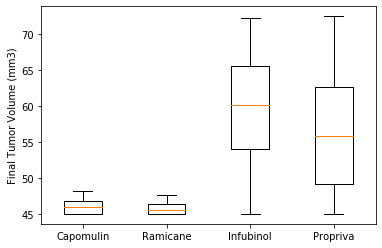

In [212]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([capomulin, ramicane, infubinol, propriva], labels=["Capomulin", "Ramicane", "Infubinol", "Propriva"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and scatter plots

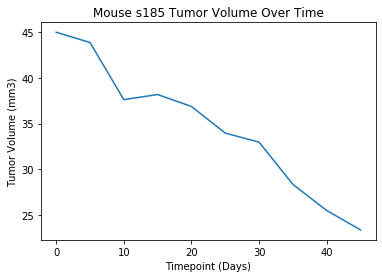

In [198]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df=merge_df.loc[(merge_df["Drug Regimen"]=="Capomulin")]
mouse_df=merge_df.loc[(merge_df["Mouse ID"]=="s185")]
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 Tumor Volume Over Time")
plt.show()



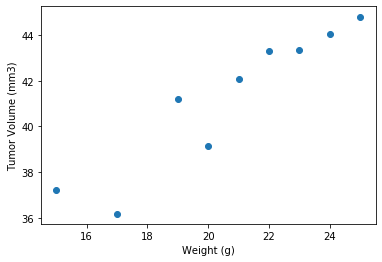

In [128]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

avg_tumor=(capomulin_df.groupby(["Weight (g)"]).mean()['Tumor Volume (mm3)'])
weight_dedupe=capomulin_df.drop_duplicates(subset="Weight (g)", keep="first", inplace=False)
cap_weight=weight_dedupe["Weight (g)"]


plt.scatter(cap_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()


The correlation between both factors is 0.93


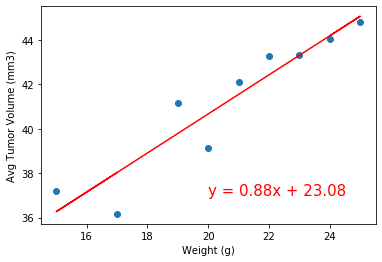

<Figure size 432x288 with 0 Axes>

In [145]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation=st.pearsonr(cap_weight, avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_weight, avg_tumor)
regress_values = cap_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_weight, avg_tumor)
plt.plot(cap_weight,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()
plt.tight_layout()